# Iris Tutorial - The Basics

<img src="asl_index-v2_region.png" width="200" align="right"/>
<a href="http://scitools.org.uk/iris/">Iris</a> is a Python library developed by the Met Office and is now being used by many climate research groups within the UK.  Iris can read in gridded data (from e.g., netcdf, grib2, met office PP) into a <a href="http://scitools.org.uk/iris/docs/latest/userguide/iris_cubes.html">'cube'</a> while retaining the coordinates (time, height, latitude and longitude) and any metadata (e.g., data source, climatological averaging).  We can apply many powerful processing algorithms to a cube (or a list of cubes, a 'cubelist') before plotting the results, all within relatively few lines of code.  The round Polar stereo example on the right with ice shelves illustrates nicely what Iris can do.  There are more examples available in the <a href="http://scitools.org.uk/iris/docs/latest/gallery.html">Iris Gallary</a>.

<b>Some useful links:</b>
 <ul>
  <li><a href="http://scitools.org.uk/iris/docs/latest/index.html">User guide</a></li>
  <li><a href="https://groups.google.com/forum/#!forum/scitools-iris">Iris forums</a></li>
  <li>Our (BAS) internal <a href="http://wiki.nerc-bas.ac.uk/wiki/index.php/Iris">Iris Wiki pages</a></li>
</ul> 

<b>We have also written some more specific Iris tutorials, including:</b>
 <ul>
  <li>Create a wind speed and direction plot (applying mathematical operations to cubes)</li>
  <li>Working with sea surface temperature (SST) and Sea Ice from the NEMO model</li>
  <li>...full list can be found <a href="https://github.com/jshosking/iris-introduction">here</a></li>
</ul> 


<br>    <i>-- This tutorial was created by <a href="https://www.bas.ac.uk/profile/jask/">Scott Hosking</a></i>


# Part 1: Reading in data

Things to highlight in this section:
* reading across multiple files (e.g., filename = ['file001.nc', 'file002.nc', ... ]
* collapsing cubes as far as possible
* lazy loading

In [1]:
# print images within notebook
#   put before matplotlib import to prevent missing libSM errors when using remotely
#   source: https://github.com/conda/conda/issues/1051#issuecomment-111578483
% matplotlib inline

import iris
import iris.plot as iplt
import iris.quickplot as qplt
import iris.analysis.cartography

import numpy as np

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Ignore warning messages for this tutorial (usually we don't do this!)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# wget https://www.unidata.ucar.edu/software/netcdf/examples/ECMWF_ERA-40_subset.nc
filename = 'ECMWF_ERA-40_subset.nc'
cubelist = iris.load(filename) # Notice how fast this is? -- lazy loading
print(cubelist)

0: 2 metre dewpoint temperature / (K)  (time: 62; latitude: 73; longitude: 144)
1: Evaporation / (unknown)             (time: 62; latitude: 73; longitude: 144)
2: High cloud cover / (unknown)        (time: 62; latitude: 73; longitude: 144)
3: 10 metre U wind component / (m s**-1) (time: 62; latitude: 73; longitude: 144)
4: Total column water / (kg m**-2)     (time: 62; latitude: 73; longitude: 144)
5: 10 metre V wind component / (m s**-1) (time: 62; latitude: 73; longitude: 144)
6: Medium cloud cover / (unknown)      (time: 62; latitude: 73; longitude: 144)
7: Total precipitation / (m)           (time: 62; latitude: 73; longitude: 144)
8: Total column water vapour / (kg m**-2) (time: 62; latitude: 73; longitude: 144)
9: 2 metre temperature / (K)           (time: 62; latitude: 73; longitude: 144)
10: Mean sea level pressure / (Pa)      (time: 62; latitude: 73; longitude: 144)
11: Boundary layer height / (m)         (time: 62; latitude: 73; longitude: 144)
12: Stratiform precipitation (L

In [3]:
filename = 'ECMWF_ERA-40_subset.nc'
cube = iris.load_cube(filename, 'Mean sea level pressure')
print(cube)

Mean sea level pressure / (Pa)      (time: 62; latitude: 73; longitude: 144)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Attributes:
          Conventions: CF-1.0
          history: 2004-09-15 17:04:29 GMT by mars2netcdf-0.92


In [4]:
# Read a multi-level data file
# (file available in github: https://github.com/jshosking/iris-introduction)
filename = 'Data/divergence.nc'
div = iris.load_cube(filename)
print(div)

divergence_of_wind / (s**-1)        (time: 24; pressure_level: 2; latitude: 34; longitude: 44)
     Dimension coordinates:
          time                           x                   -            -              -
          pressure_level                 -                   x            -              -
          latitude                       -                   -            x              -
          longitude                      -                   -            -              x
     Attributes:
          Conventions: CF-1.5


In [5]:
# Find out which pressure levels are included within 'div'
print(div.coords('pressure_level'))

[DimCoord(array([200, 300], dtype=int32), standard_name=None, units=Unit('millibars'), long_name=u'pressure_level', var_name='level')]


In [6]:
# Constraining data to read one level
filename= 'Data/divergence.nc'
con = iris.Constraint(name='divergence_of_wind', pressure_level=200)
div = iris.load_cube(filename, constraint=con)
print(div)

divergence_of_wind / (s**-1)        (time: 24; latitude: 34; longitude: 44)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Scalar coordinates:
          pressure_level: 200 millibars
     Attributes:
          Conventions: CF-1.5


# Plotting data

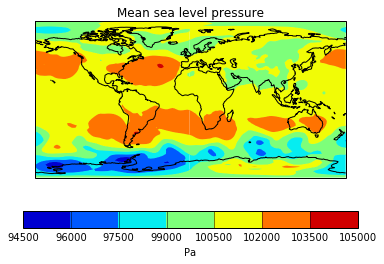

In [7]:
# Quick Plot

import iris.quickplot as qplt

qplt.contourf(cube[0])
plt.gca().coastlines()
plt.show()

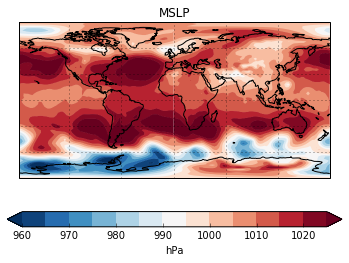

In [8]:
### qplt works well if you just want a quick look at the data but
### for producing something for a paper or presentation
### we would want greater control, this is where iplt (iris.plot) comes in.

import iris.plot as iplt

cube.convert_units('hPa')
 
fig = plt.figure()
 
ax = plt.axes(projection=ccrs.PlateCarree())
 
plt.gca().coastlines()
 
levels  = np.arange(960, 1030, 5)
 
contours = iplt.contourf(cube[0], levels, cmap='RdBu_r', extend='both')
 
ax.gridlines()
cbar = plt.colorbar(contours, orientation='horizontal')
cbar.set_label(cube.units)
plt.title(r"MSLP")
 
plt.show()

# Part 2: Explore the cube 

In [9]:
print(cube)

Mean sea level pressure / (hPa)     (time: 62; latitude: 73; longitude: 144)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Attributes:
          Conventions: CF-1.0
          history: 2004-09-15 17:04:29 GMT by mars2netcdf-0.92


In [10]:
cube.coord('latitude')

DimCoord(array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,
        67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,
        45. ,  42.5,  40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,
        22.5,  20. ,  17.5,  15. ,  12.5,  10. ,   7.5,   5. ,   2.5,
         0. ,  -2.5,  -5. ,  -7.5, -10. , -12.5, -15. , -17.5, -20. ,
       -22.5, -25. , -27.5, -30. , -32.5, -35. , -37.5, -40. , -42.5,
       -45. , -47.5, -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. ,
       -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5, -90. ], dtype=float32), standard_name='latitude', units=Unit('degrees'), long_name=u'latitude', var_name='latitude')

In [11]:
lons = cube.coord('longitude').points
print(lons)
type(lons)

[   0.     2.5    5.     7.5   10.    12.5   15.    17.5   20.    22.5
   25.    27.5   30.    32.5   35.    37.5   40.    42.5   45.    47.5
   50.    52.5   55.    57.5   60.    62.5   65.    67.5   70.    72.5
   75.    77.5   80.    82.5   85.    87.5   90.    92.5   95.    97.5
  100.   102.5  105.   107.5  110.   112.5  115.   117.5  120.   122.5
  125.   127.5  130.   132.5  135.   137.5  140.   142.5  145.   147.5
  150.   152.5  155.   157.5  160.   162.5  165.   167.5  170.   172.5
  175.   177.5  180.   182.5  185.   187.5  190.   192.5  195.   197.5
  200.   202.5  205.   207.5  210.   212.5  215.   217.5  220.   222.5
  225.   227.5  230.   232.5  235.   237.5  240.   242.5  245.   247.5
  250.   252.5  255.   257.5  260.   262.5  265.   267.5  270.   272.5
  275.   277.5  280.   282.5  285.   287.5  290.   292.5  295.   297.5
  300.   302.5  305.   307.5  310.   312.5  315.   317.5  320.   322.5
  325.   327.5  330.   332.5  335.   337.5  340.   342.5  345.   347.5
  350.

numpy.ndarray

# Part 3: Processing data within the cube

In [12]:
cube = iris.load_cube('ECMWF_ERA-40_subset.nc', 'Mean sea level pressure')
print(cube)

Mean sea level pressure / (Pa)      (time: 62; latitude: 73; longitude: 144)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Attributes:
          Conventions: CF-1.0
          history: 2004-09-15 17:04:29 GMT by mars2netcdf-0.92


In [13]:
# Average data over the time coordinate
cube.collapsed('time', iris.analysis.MEAN)

<iris 'Cube' of Mean sea level pressure / (Pa) (latitude: 73; longitude: 144)>

In [14]:
# or instead, average over longitudes and/or latitudes

cube.coord('latitude').guess_bounds()
cube.coord('longitude').guess_bounds()

weights=iris.analysis.cartography.area_weights(cube)

cube.collapsed(['latitude','longitude'], iris.analysis.MEAN, weights=weights)

<iris 'Cube' of Mean sea level pressure / (Pa) (time: 62)>

In [15]:
# Extract an area from the cube
tmp = cube.intersection(longitude=(170.,298.), latitude=(-78,-60))

print(cube[0].data.shape)
print(tmp[0].data.shape)

(73, 144)
(8, 52)


In [16]:
# Interpolate data onto a new grid
lats, lons = cube.coord('latitude'), cube.coord('longitude')
lat_min, lon_min = lats.points.min(), lons.points.min()
lat_max, lon_max = lats.points.max(), lons.points.max()
new_lats = np.linspace(lat_min, lat_max, 34)
new_lons = np.linspace(lon_min, lon_max, 44)
new_cube = cube.interpolate([('latitude', new_lats),('longitude',new_lons)], 
                                    iris.analysis.Linear() )

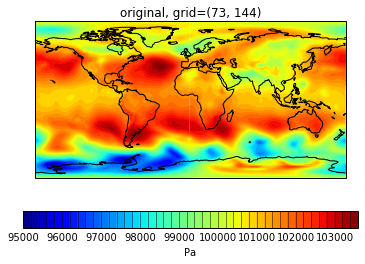

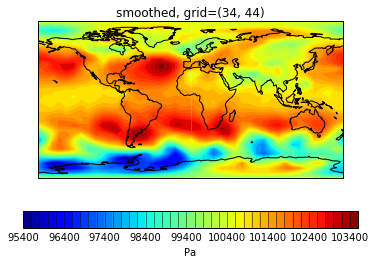

In [17]:
qplt.contourf(cube[0], 50)
plt.gca().coastlines()
plt.title(r'original, grid='+str(cube[0].data.shape)+'')
plt.show()

qplt.contourf(new_cube[0], 50)
plt.gca().coastlines()
plt.title(r'smoothed, grid='+str(new_cube[0].data.shape)+'')
plt.show()

# Saving your cube to a file

In [18]:
iris.save(cube, 'myfile.nc')